# Student data analysis

## General analysis

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl
from math import ceil

%matplotlib inline

Import data and print shape (dimensions).

In [17]:
plt.style.use('classic')
data = pd.read_csv("student_data.csv")
data.shape

(526, 16)

Print first 5 rows of data.

In [18]:
data.head(5)

,gender,reason,traveltime,studytime,failures,activities,higher,siblings,freetime,hangouts_p_week,absences,maths,stats,comp_sci,parentedu,god
0,F,course,2,2,0,no,yes,2,3,4,4,F,B,B,Masters,yes
1,F,course,1,2,0,no,yes,3,3,3,2,C,B,B,10th Pass,yes
2,F,other,1,2,0,no,yes,2,3,2,6,B,B+,B,10th Pass,yes
3,F,home,1,3,0,yes,yes,2,2,2,0,B+,B+,B+,Masters,No
4,F,home,1,2,0,no,yes,2,3,2,0,B,B+,B+,Bachelors,yes


Printing number of unique values for each object type.

In [12]:
data.select_dtypes('object').nunique()

gender        2
reason        4
activities    2
higher        2
maths         7
stats         8
comp_sci      8
parentedu     4
god           2
dtype: int64

Calculate missing data.


In [13]:
data.isnull().sum()/data.shape[0]

gender             0.0
reason             0.0
traveltime         0.0
studytime          0.0
failures           0.0
activities         0.0
higher             0.0
siblings           0.0
freetime           0.0
hangouts_p_week    0.0
absences           0.0
maths              0.0
stats              0.0
comp_sci           0.0
parentedu          0.0
god                0.0
dtype: float64

Calculate descriptive statistics for valid objects.

In [14]:
data.describe()

,traveltime,studytime,failures,siblings,freetime,hangouts_p_week,absences
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,1.501901,1.979087,0.188213,2.169202,3.186312,3.174905,3.882129
std,0.740010,0.844895,0.545749,0.638363,0.998801,1.169378,4.911152
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,2.000000,3.000000,2.000000,0.000000
50%,1.000000,2.000000,0.000000,2.000000,3.000000,3.000000,2.000000
75%,2.000000,2.000000,0.000000,3.000000,4.000000,4.000000,6.000000
max,4.000000,4.000000,3.000000,3.000000,5.000000,5.000000,32.000000


## Analyzing individual attributes

Studytime.

Target looks like classification


[None, None]

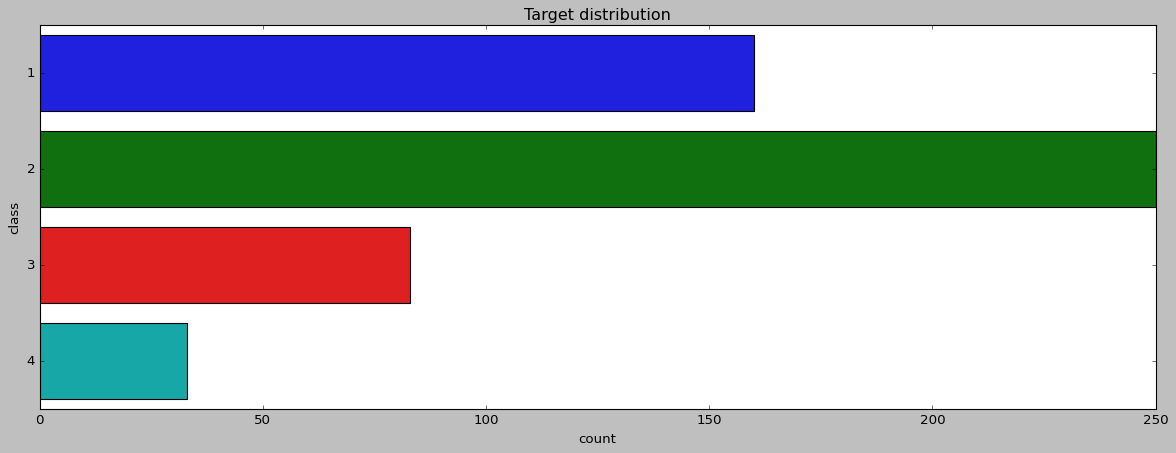

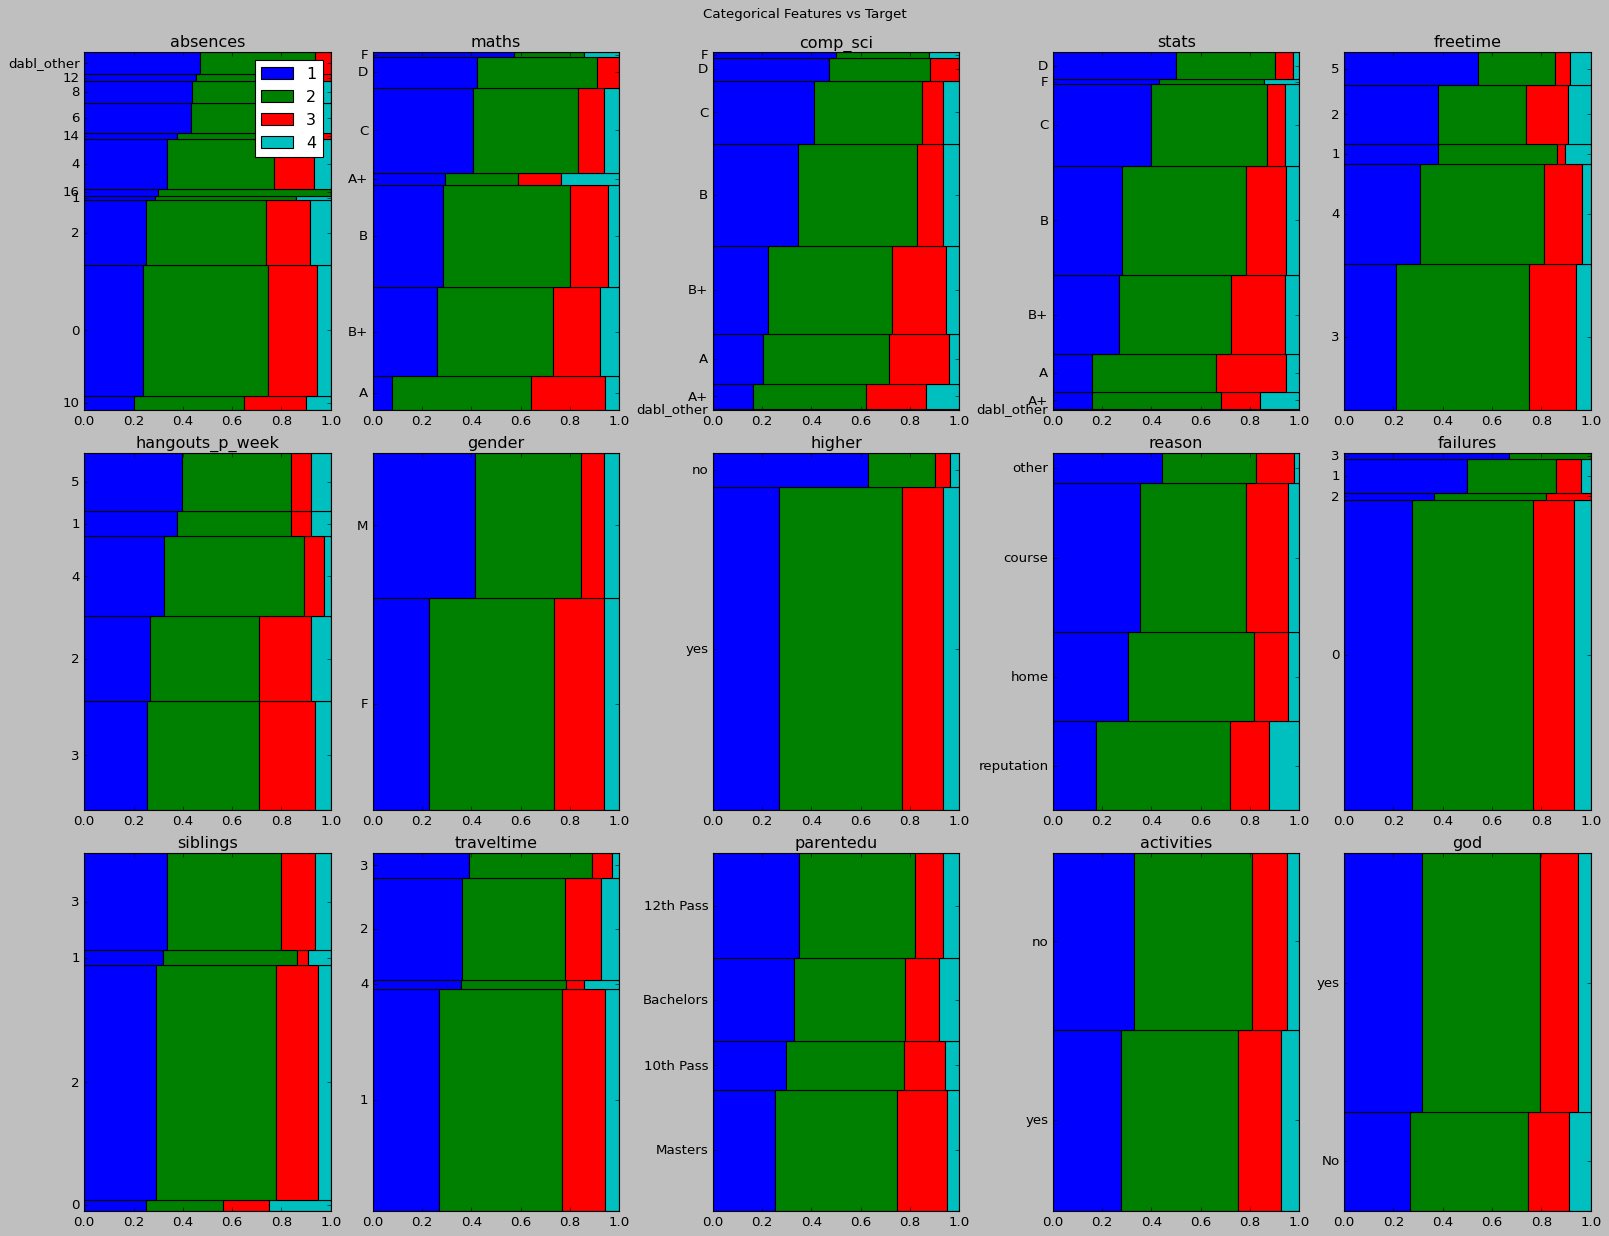

In [19]:
plt.rcParams['figure.figsize'] = (18, 6)
dabl.plot(data, target_col = 'studytime')

Hangouts per week.

Target looks like classification


[None, None]

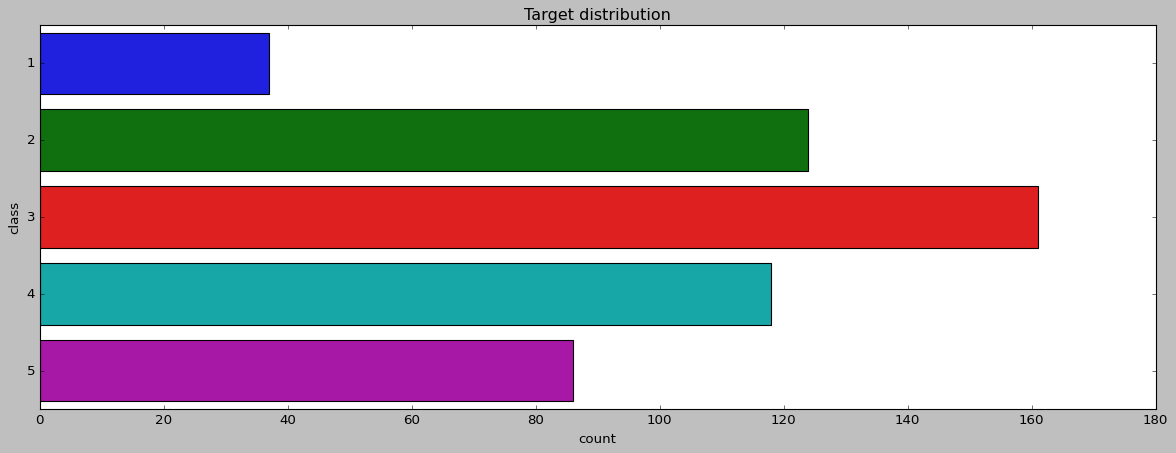

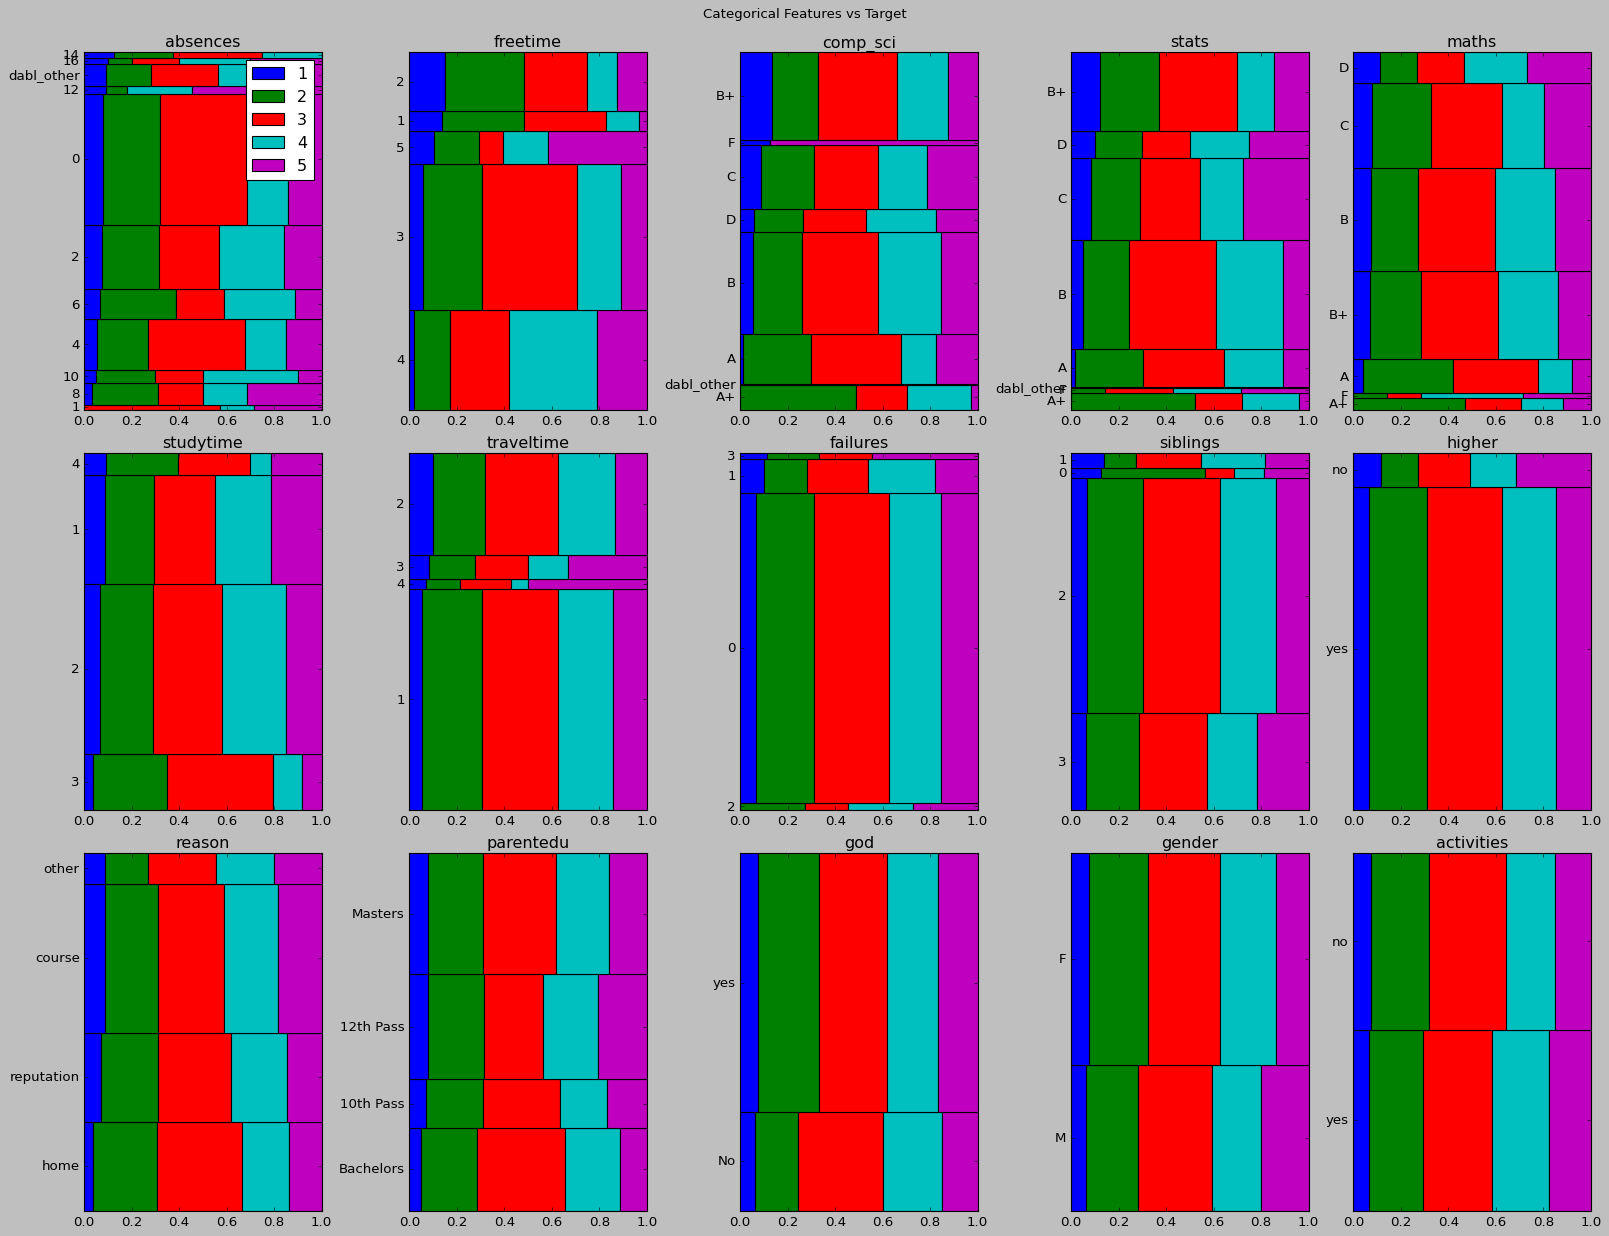

In [21]:
plt.rcParams['figure.figsize'] = (18, 6)
dabl.plot(data, target_col = 'hangouts_p_week')

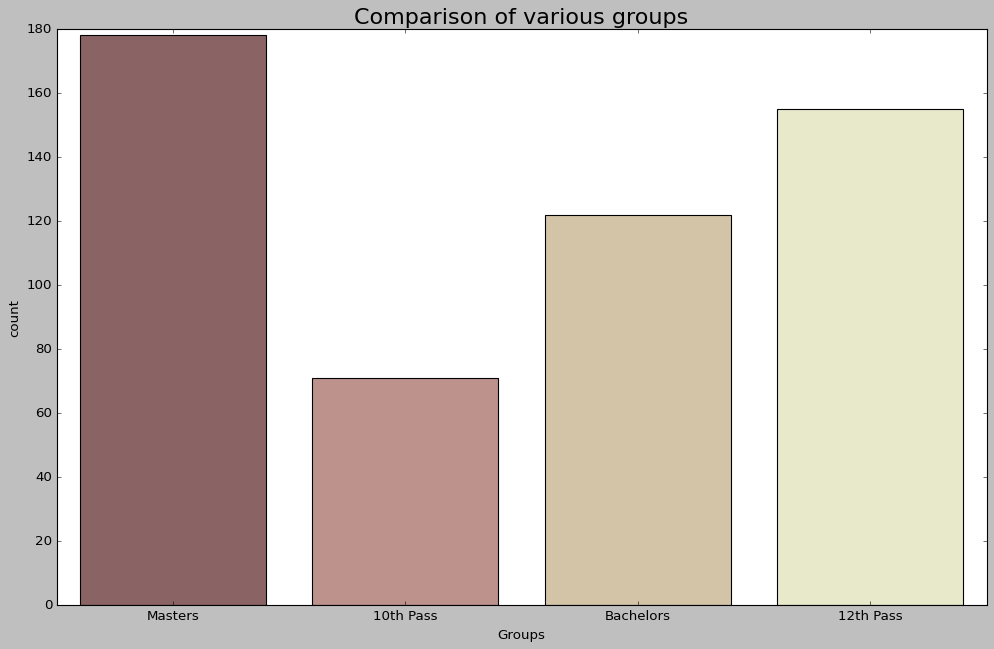

In [23]:
plt.rcParams['figure.figsize'] = (15, 9)

sns.countplot(x = data['parentedu'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

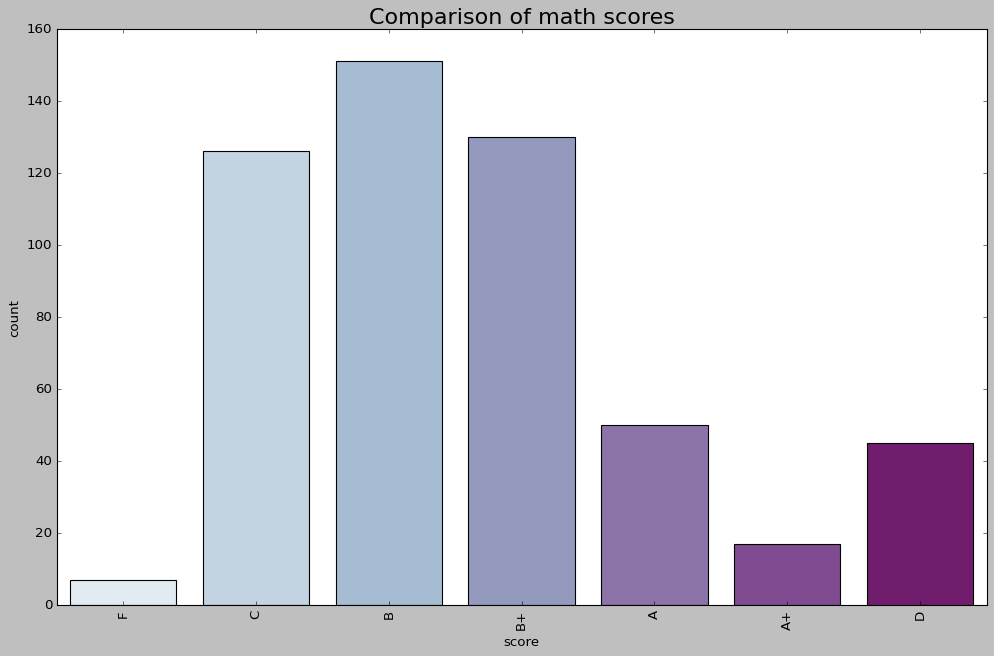

In [24]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x = data['maths'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()